In [62]:

#########################################################################################################
#####  This file designed a LSTM network and implemented it using Keras library to learn simple arithmetic 
#####  operations. The objective of the network is estimating result of addition or subtraction of two numbers
#########################################################################################################

######################################################################
####  function for generating all pairs of query and answer######
######################################################################

def generate():
    X, y = list(), list()
# for + opertions
    for i in range(100): 
        for j in range(100):

            i_j = [i,j]
            i_j_map = map(str, i_j) 

            strp = '+'.join(i_j_map)
            strp =  strp + ''.join([' ' for _ in range(5-len(strp))])    

            X.append(strp)

            #convert sum into string, then concat proper number of spaces
            out_pattern = sum(i_j)
            str_out = str(out_pattern)
            str_out = '+' + str_out + ''.join([' ' for _ in range(3-len(str_out))])
            y.append(str_out)

##for - operations

            i_j = [i,j]
            i_j_map = map(str, i_j) 

            strp2 = '-'.join(i_j_map)
            strp2 =  strp2 + ''.join([' ' for _ in range(5-len(strp2))])  

            X.append(strp2)
            
            #convert sum into string, then concat proper number of spaces

            out_pattern2 = i - j
            if(out_pattern2 >= 0):
                str_out2 = '+' + str(out_pattern2)
            else:
                str_out2 = str(out_pattern2)

            str_out2 = str_out2 + ''.join([' ' for _ in range(4-len(str_out2))]) 

            y.append(str_out2)

    print("Query(X): "+ str(X))
    print("Answer(Y): "+ str(y))
    
generate()

Query(X): ['0+0  ', '0-0  ', '0+1  ', '0-1  ', '0+2  ', '0-2  ', '0+3  ', '0-3  ', '0+4  ', '0-4  ', '0+5  ', '0-5  ', '0+6  ', '0-6  ', '0+7  ', '0-7  ', '0+8  ', '0-8  ', '0+9  ', '0-9  ', '0+10 ', '0-10 ', '0+11 ', '0-11 ', '0+12 ', '0-12 ', '0+13 ', '0-13 ', '0+14 ', '0-14 ', '0+15 ', '0-15 ', '0+16 ', '0-16 ', '0+17 ', '0-17 ', '0+18 ', '0-18 ', '0+19 ', '0-19 ', '0+20 ', '0-20 ', '0+21 ', '0-21 ', '0+22 ', '0-22 ', '0+23 ', '0-23 ', '0+24 ', '0-24 ', '0+25 ', '0-25 ', '0+26 ', '0-26 ', '0+27 ', '0-27 ', '0+28 ', '0-28 ', '0+29 ', '0-29 ', '0+30 ', '0-30 ', '0+31 ', '0-31 ', '0+32 ', '0-32 ', '0+33 ', '0-33 ', '0+34 ', '0-34 ', '0+35 ', '0-35 ', '0+36 ', '0-36 ', '0+37 ', '0-37 ', '0+38 ', '0-38 ', '0+39 ', '0-39 ', '0+40 ', '0-40 ', '0+41 ', '0-41 ', '0+42 ', '0-42 ', '0+43 ', '0-43 ', '0+44 ', '0-44 ', '0+45 ', '0-45 ', '0+46 ', '0-46 ', '0+47 ', '0-47 ', '0+48 ', '0-48 ', '0+49 ', '0-49 ', '0+50 ', '0-50 ', '0+51 ', '0-51 ', '0+52 ', '0-52 ', '0+53 ', '0-53 ', '0+54 ', '0-54 ',

In [63]:

######################################################################
# function to return the one hot encoding for ONE sequence PAIR
######################################################################


import numpy as np
from numpy import array
from numpy import argmax
from keras.utils import to_categorical

def encode(test, res):# test is one element in Query, res is the corresponding elelment in Answer
    alphabet = ['0','1','2','3','4','5','6','7','8','9','+','-',' ']
    #alphabet = array(alphabet)
    #adopted code from https:/ªª/www.educative.io/edpresso/how-to-perform-one-hot-encoding-using-keras
    # and https://machinelearningmastery.com/learn-add-numbers-seq2seq-recurrent-neural-networks/

    ### map each char to an integer
    mapping = {}
    for x in range(len(alphabet)):
        mapping[alphabet[x]] = x


    test = list(test)
    res = list(res)


    # integer representation
    for x in range(len(test)):
        test[x] = mapping[test[x]]

    one_hot_encode_x = to_categorical(test, num_classes = 13)
    
    
    #print(one_hot_encode_x)

    for x in range(len(res)):
        res[x] = mapping[res[x]]

    one_hot_encode_y = to_categorical(res, num_classes = 13)

    return one_hot_encode_x, one_hot_encode_y

######################################################################
####### make the data into encoded format #####################v#######
######################################################################
encoded_X = np.zeros((20000, 5, 13))            
encoded_y = np.zeros((20000, 4, 13))          

for i in range(20000):                                               
    encoded_X[i], encoded_y[i] = encode(X[i], y[i])
    
print(np.shape(encoded_y))

(20000, 4, 13)


In [33]:

###This architecture is comprised of two models: 
#model.add(LSTM(13.....)  is for reading the input sequence and encoding it into a fixed-length vector, 
#model.add(LSTM(13, return_sequences=True) is for decoding the fixed-length vector and outputting the predicted sequence. 
#separted by the RepeatedVector layer 

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed


model1 = Sequential()
model1.add(LSTM(13, input_shape=(5, 13), return_sequences=False)) # this serves as the encoder
model1.add(RepeatVector(4)) # This layer repeats the provided 2D input 4 times to create a 3D output.
# because the encoder  produce a 2-dimensional matrix of outputs, 
#where the length is defined by the number of memory cells in the layer, which is 16 in this case.
#The decoder is an LSTM layer that expects a 3D input of [samples, time steps, features] 
#in order to produce a decoded sequence of lengh 4.


#The concept behind this is to extract the meaning of the character in a form of a spatial representation 
#where each dimension will be a characteristic defining the character


model1.add(LSTM(13, return_sequences=True))#this serves as the decoder. return_sequence is true so that the next dense layer can make a prediction
model1.add((Dense(13, activation='softmax')))#a Dense layer is used as the output for the network


In [34]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam


train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

# train is now 70% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(encoded_X, encoded_y, test_size=0.3)

# test is now 15% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, batch_size= 100, epochs=100,shuffle=True, validation_data=(x_val, y_val))



Epoch 1/100
140/140 [==============================] - 1s 7ms/step - loss: 2.3327 - accuracy: 0.2641 - val_loss: 2.0751 - val_accuracy: 0.3995
Epoch 2/100
140/140 [==============================] - 1s 4ms/step - loss: 1.8087 - accuracy: 0.4771 - val_loss: 1.6357 - val_accuracy: 0.5024
Epoch 3/100
140/140 [==============================] - 1s 4ms/step - loss: 1.5550 - accuracy: 0.5025 - val_loss: 1.5012 - val_accuracy: 0.5002
Epoch 4/100
140/140 [==============================] - 1s 4ms/step - loss: 1.4677 - accuracy: 0.5022 - val_loss: 1.4410 - val_accuracy: 0.5006
Epoch 5/100
140/140 [==============================] - 1s 4ms/step - loss: 1.4194 - accuracy: 0.5039 - val_loss: 1.3986 - val_accuracy: 0.5046
Epoch 6/100
140/140 [==============================] - 1s 4ms/step - loss: 1.3783 - accuracy: 0.5056 - val_loss: 1.3609 - val_accuracy: 0.5065
Epoch 7/100
140/140 [==============================] - 1s 4ms/step - loss: 1.3439 - accuracy: 0.5073 - val_loss: 1.3316 - val_accuracy: 0.5107

In [35]:
model2 = Sequential()
model2.add(LSTM(128, input_shape=(5, 13), return_sequences=False)) # this serves as the encoder
model2.add(RepeatVector(4)) # This layer repeats the provided 2D input 4 times to create a 3D output.
model2.add(LSTM(128, return_sequences=True))#this serves as the decoder. return_sequence is true so that dense layer can make a  prediction
model2.add((Dense(13, activation='softmax')))#a Dense layer is used as the output for the network

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, batch_size=100, epochs=100,shuffle=True, validation_data=(x_val, y_val))

Epoch 1/100
140/140 [==============================] - 2s 13ms/step - loss: 1.7661 - accuracy: 0.4194 - val_loss: 1.3473 - val_accuracy: 0.5067
Epoch 2/100
140/140 [==============================] - 2s 11ms/step - loss: 1.3101 - accuracy: 0.5205 - val_loss: 1.2793 - val_accuracy: 0.5325
Epoch 3/100
140/140 [==============================] - 1s 11ms/step - loss: 1.2565 - accuracy: 0.5401 - val_loss: 1.2231 - val_accuracy: 0.5499
Epoch 4/100
140/140 [==============================] - 2s 12ms/step - loss: 1.1842 - accuracy: 0.5671 - val_loss: 1.1419 - val_accuracy: 0.5770
Epoch 5/100
140/140 [==============================] - 2s 13ms/step - loss: 1.1060 - accuracy: 0.5962 - val_loss: 1.0581 - val_accuracy: 0.6160
Epoch 6/100
140/140 [==============================] - 2s 13ms/step - loss: 1.0373 - accuracy: 0.6274 - val_loss: 1.0052 - val_accuracy: 0.6402
Epoch 7/100
140/140 [==============================] - 2s 11ms/step - loss: 0.9950 - accuracy: 0.6439 - val_loss: 0.9744 - val_accuracy:

In [36]:
model3 = Sequential()
model3.add(LSTM(128, input_shape=(5, 13), return_sequences=False)) # this serves as the encoder
model3.add(RepeatVector(4)) # This layer repeats the provided 2D input 4 times to create a 3D output.
model3.add(LSTM(128, return_sequences=True))#this serves as the decoder. return_sequence is true so that dense layer can make a  prediction
model3.add((Dense(13, activation='softmax')))#a Dense layer is used as the output for the network

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history3 = model3.fit(x_train, y_train, batch_size=50,epochs=200,shuffle=True, validation_data=(x_val, y_val))


Epoch 1/200
280/280 [==============================] - 2s 7ms/step - loss: 1.5755 - accuracy: 0.4619 - val_loss: 1.2887 - val_accuracy: 0.5221
Epoch 2/200
280/280 [==============================] - 2s 6ms/step - loss: 1.2255 - accuracy: 0.5525 - val_loss: 1.1473 - val_accuracy: 0.5782
Epoch 3/200
280/280 [==============================] - 2s 6ms/step - loss: 1.1016 - accuracy: 0.5983 - val_loss: 1.0443 - val_accuracy: 0.6351
Epoch 4/200
280/280 [==============================] - 2s 6ms/step - loss: 1.0270 - accuracy: 0.6274 - val_loss: 1.0203 - val_accuracy: 0.6247
Epoch 5/200
280/280 [==============================] - 2s 6ms/step - loss: 0.9648 - accuracy: 0.6541 - val_loss: 0.9291 - val_accuracy: 0.6717
Epoch 6/200
280/280 [==============================] - 2s 6ms/step - loss: 0.9273 - accuracy: 0.6653 - val_loss: 0.8973 - val_accuracy: 0.6823
Epoch 7/200
280/280 [==============================] - 2s 6ms/step - loss: 0.8978 - accuracy: 0.6740 - val_loss: 0.8818 - val_accuracy: 0.6880

In [37]:
model4 = Sequential()
model4.add(LSTM(256, input_shape=(5, 13), return_sequences=False)) # this serves as the encoder
model4.add(RepeatVector(4)) # This layer repeats the provided 2D input 4 times to create a 3D output.
model4.add(LSTM(256, return_sequences=True))#this serves as the decoder. return_sequence is true so that dense layer can make a  prediction
model4.add((Dense(13, activation='softmax')))#a Dense layer is used as the output for the network

model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history4 = model4.fit(x_train, y_train, batch_size=100, epochs=100,shuffle=True, validation_data=(x_val, y_val))

Epoch 1/100
140/140 [==============================] - 3s 25ms/step - loss: 1.6822 - accuracy: 0.4252 - val_loss: 1.3207 - val_accuracy: 0.5116
Epoch 2/100
140/140 [==============================] - 3s 21ms/step - loss: 1.2550 - accuracy: 0.5424 - val_loss: 1.1956 - val_accuracy: 0.5672
Epoch 3/100
140/140 [==============================] - 3s 21ms/step - loss: 1.1266 - accuracy: 0.5903 - val_loss: 1.0784 - val_accuracy: 0.5905
Epoch 4/100
140/140 [==============================] - 3s 21ms/step - loss: 1.0127 - accuracy: 0.6347 - val_loss: 0.9897 - val_accuracy: 0.6403
Epoch 5/100
140/140 [==============================] - 3s 22ms/step - loss: 0.9530 - accuracy: 0.6557 - val_loss: 0.9314 - val_accuracy: 0.6672
Epoch 6/100
140/140 [==============================] - 3s 23ms/step - loss: 0.9082 - accuracy: 0.6721 - val_loss: 0.8841 - val_accuracy: 0.6852
Epoch 7/100
140/140 [==============================] - 3s 22ms/step - loss: 0.8689 - accuracy: 0.6872 - val_loss: 0.8839 - val_accuracy:

# 

In [38]:
results1 = model1.evaluate(x_test, y_test, batch_size=128)
results2 = model2.evaluate(x_test, y_test, batch_size=128)
results3 = model3.evaluate(x_test, y_test, batch_size=128)
results4 = model4.evaluate(x_test, y_test, batch_size=128)


24/24 [==============================] - 0s 8ms/step - loss: 0.0055 - accuracy: 0.9987


In [40]:
model5 = Sequential()
model5.add(LSTM(32, input_shape=(5, 13), return_sequences=False)) # this serves as the encoder
model5.add(RepeatVector(4)) # This layer repeats the provided 2D input 4 times to create a 3D output.
model5.add(LSTM(32, return_sequences=True))#this serves as the decoder. return_sequence is true so that dense layer can make a  prediction
model5.add((Dense(13, activation='softmax')))#a Dense layer is used as the output for the network

model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history5 = model5.fit(x_train, y_train, batch_size=100, epochs=100,shuffle=True, validation_data=(x_val, y_val))
results5 = model5.evaluate(x_test, y_test, batch_size=128)



Epoch 1/100
140/140 [==============================] - 1s 9ms/step - loss: 2.1900 - accuracy: 0.3035 - val_loss: 1.6698 - val_accuracy: 0.5024
Epoch 2/100
140/140 [==============================] - 1s 4ms/step - loss: 1.4917 - accuracy: 0.5024 - val_loss: 1.4075 - val_accuracy: 0.5033
Epoch 3/100
140/140 [==============================] - 1s 4ms/step - loss: 1.3710 - accuracy: 0.5036 - val_loss: 1.3413 - val_accuracy: 0.5118
Epoch 4/100
140/140 [==============================] - 1s 4ms/step - loss: 1.3256 - accuracy: 0.5152 - val_loss: 1.3103 - val_accuracy: 0.5241
Epoch 5/100
140/140 [==============================] - 1s 4ms/step - loss: 1.2995 - accuracy: 0.5221 - val_loss: 1.2911 - val_accuracy: 0.5269
Epoch 6/100
140/140 [==============================] - 1s 4ms/step - loss: 1.2759 - accuracy: 0.5296 - val_loss: 1.2783 - val_accuracy: 0.5312
Epoch 7/100
140/140 [==============================] - 1s 4ms/step - loss: 1.2498 - accuracy: 0.5406 - val_loss: 1.2404 - val_accuracy: 0.5422

In [39]:
model6 = Sequential()
model6.add(LSTM(32, input_shape=(5, 13), return_sequences=False)) # this serves as the encoder
model6.add(RepeatVector(4)) # This layer repeats the provided 2D input 4 times to create a 3D output.
model6.add(LSTM(32, return_sequences=True))#this serves as the decoder. return_sequence is true so that dense layer can make a  prediction
model6.add((Dense(13, activation='softmax')))#a Dense layer is used as the output for the network

model6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history6 = model6.fit(x_train, y_train, batch_size=100, epochs=1000,shuffle=True, validation_data=(x_val, y_val))
results6 = model6.evaluate(x_test, y_test, batch_size=128)


Epoch 1/1000
140/140 [==============================] - 1s 10ms/step - loss: 2.1581 - accuracy: 0.3150 - val_loss: 1.6240 - val_accuracy: 0.5020
Epoch 2/1000
140/140 [==============================] - 1s 5ms/step - loss: 1.4632 - accuracy: 0.5028 - val_loss: 1.3863 - val_accuracy: 0.5038
Epoch 3/1000
140/140 [==============================] - 1s 5ms/step - loss: 1.3499 - accuracy: 0.5073 - val_loss: 1.3268 - val_accuracy: 0.5094
Epoch 4/1000
140/140 [==============================] - 1s 5ms/step - loss: 1.3092 - accuracy: 0.5184 - val_loss: 1.2939 - val_accuracy: 0.5237
Epoch 5/1000
140/140 [==============================] - 1s 4ms/step - loss: 1.2783 - accuracy: 0.5276 - val_loss: 1.2646 - val_accuracy: 0.5313
Epoch 6/1000
140/140 [==============================] - 1s 4ms/step - loss: 1.2454 - accuracy: 0.5343 - val_loss: 1.2486 - val_accuracy: 0.5329
Epoch 7/1000
140/140 [==============================] - 1s 4ms/step - loss: 1.2130 - accuracy: 0.5469 - val_loss: 1.2032 - val_accuracy

In [ ]:
################################################################
########  best test acccuracy is achieved by model3

#model3 = Sequential()
#model3.add(LSTM(128, input_shape=(5, 13), return_sequences=False)) # this serves as the encoder
#model3.add(RepeatVector(4)) # This layer repeats the provided 2D input 4 times to create a 3D output.
#model3.add(LSTM(128, return_sequences=True))#this serves as the decoder. return_sequence is true so that dense layer can make a  prediction
#model3.add((Dense(13, activation='softmax')))#a Dense layer is used as the output for the network

#model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#history3 = model.fit(x_train, y_train, batch_size=50,epochs=200,shuffle=True, validation_data=(x_val, y_val))

################################################################

In [64]:
################################################################
##### reverse Query and Answer then put in new list
################################################################
reversed_X = list()          
reversed_y = list()
print(X[998])
print(len(X[998]))
print(encoded_X[998])

for i in range(20000):                                               
    #encoded_X[i], encoded_y[i] = encode(X[i], y[i])
    reversed_X.append(X[i][::-1])
    reversed_y.append(y[i][::-1])
    
print(reversed_X[998])
print(len(reversed_X[998]))



 99+4
5
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
4+99 
5


In [65]:
encoded_reversed_X = np.zeros((20000, 5, 13))            
encoded_reversed_y = np.zeros((20000, 4, 13))          

for i in range(20000):                                               
    encoded_reversed_X[i], encoded_reversed_y[i] = encode(reversed_X[i], reversed_y[i])
    
print(reversed_X[998])
print(encoded_X[998])

print(encoded_reversed_X[998])
 

4+99 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [73]:
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

# train is now 70% of the entire data set
reversed_x_train, reversed_x_test, reversed_y_train, reversed_y_test = train_test_split(encoded_reversed_X, encoded_reversed_y, test_size=0.3)

# test is now 15% of the initial data set
# validation is now 15% of the initial data set
reversed_x_val, reversed_x_test, reversed_y_val, reversed_y_test = train_test_split(reversed_x_test, reversed_y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

reversed_model3 = Sequential()
reversed_model3.add(LSTM(128, input_shape=(5, 13), return_sequences=False)) # this serves as the encoder
reversed_model3.add(RepeatVector(4)) # This layer repeats the provided 2D input 4 times to create a 3D output.
reversed_model3.add(LSTM(128, return_sequences=True))#this serves as the decoder. return_sequence is true so that dense layer can make a  prediction
reversed_model3.add((Dense(13, activation='softmax')))#a Dense layer is used as the output for the network

reversed_model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
reversed_history3 = reversed_model3.fit(reversed_x_train, reversed_y_train, batch_size=50,epochs=100,shuffle=True, validation_data=(reversed_x_val, reversed_y_val))
reversed_results3 = reversed_model3.evaluate(reversed_x_test, reversed_y_test, batch_size=128)



Epoch 1/100
280/280 [==============================] - 2s 8ms/step - loss: 1.5661 - accuracy: 0.4633 - val_loss: 1.2934 - val_accuracy: 0.5305
Epoch 2/100
280/280 [==============================] - 2s 6ms/step - loss: 1.2518 - accuracy: 0.5438 - val_loss: 1.1848 - val_accuracy: 0.5656
Epoch 3/100
280/280 [==============================] - 2s 7ms/step - loss: 1.1312 - accuracy: 0.5853 - val_loss: 1.0513 - val_accuracy: 0.6188
Epoch 4/100
280/280 [==============================] - 2s 6ms/step - loss: 1.0317 - accuracy: 0.6267 - val_loss: 1.0332 - val_accuracy: 0.6248
Epoch 5/100
280/280 [==============================] - 2s 6ms/step - loss: 0.9857 - accuracy: 0.6429 - val_loss: 0.9920 - val_accuracy: 0.6241
Epoch 6/100
280/280 [==============================] - 2s 6ms/step - loss: 0.9422 - accuracy: 0.6625 - val_loss: 0.9265 - val_accuracy: 0.6572
Epoch 7/100
280/280 [==============================] - 2s 6ms/step - loss: 0.9137 - accuracy: 0.6712 - val_loss: 0.9151 - val_accuracy: 0.6653

In [72]:
model3 = Sequential()
model3.add(LSTM(128, input_shape=(5, 13), return_sequences=False)) # this serves as the encoder
model3.add(RepeatVector(4)) # This layer repeats the provided 2D input 4 times to create a 3D output.
model3.add(LSTM(128, return_sequences=True))#this serves as the decoder. return_sequence is true so that dense layer can make a  prediction
model3.add((Dense(13, activation='softmax')))#a Dense layer is used as the output for the network

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history3 = model3.fit(x_train, y_train, batch_size=50,epochs=100,shuffle=True, validation_data=(x_val, y_val))


Epoch 1/100
280/280 [==============================] - 2s 8ms/step - loss: 1.5687 - accuracy: 0.4666 - val_loss: 1.2886 - val_accuracy: 0.5292
Epoch 2/100
280/280 [==============================] - 2s 6ms/step - loss: 1.2346 - accuracy: 0.5469 - val_loss: 1.1653 - val_accuracy: 0.5735
Epoch 3/100
280/280 [==============================] - 2s 6ms/step - loss: 1.1113 - accuracy: 0.5939 - val_loss: 1.0915 - val_accuracy: 0.5974
Epoch 4/100
280/280 [==============================] - 2s 6ms/step - loss: 1.0196 - accuracy: 0.6327 - val_loss: 0.9862 - val_accuracy: 0.6436
Epoch 5/100
280/280 [==============================] - 2s 6ms/step - loss: 0.9619 - accuracy: 0.6560 - val_loss: 0.9597 - val_accuracy: 0.6431
Epoch 6/100
280/280 [==============================] - 2s 6ms/step - loss: 0.9238 - accuracy: 0.6679 - val_loss: 0.9142 - val_accuracy: 0.6752
Epoch 7/100
280/280 [==============================] - 2s 7ms/step - loss: 0.8895 - accuracy: 0.6825 - val_loss: 0.8758 - val_accuracy: 0.6892

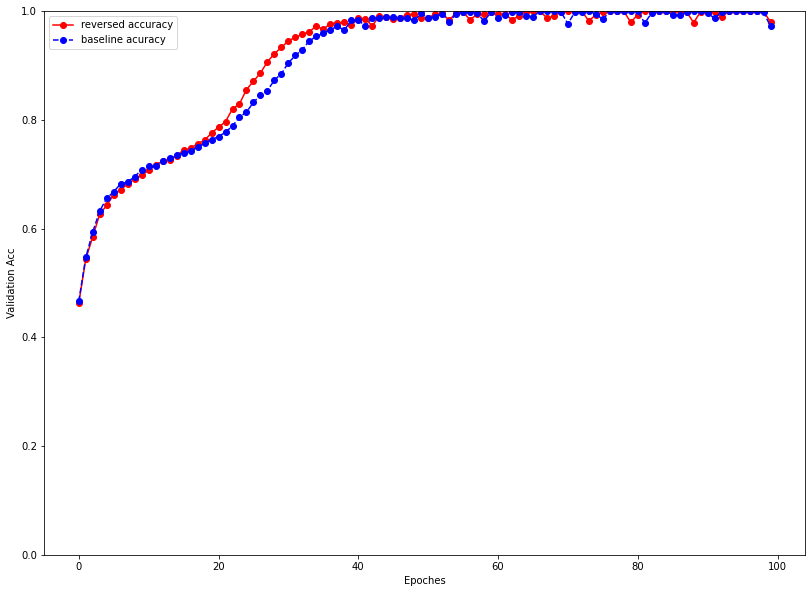

In [84]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(10)
plt.subplot(1,2,1)
plt.plot(reversed_history3.history['accuracy'], label='reversed accuracy',  color='red', marker='o', linestyle='solid')
plt.plot(history3.history['accuracy'], label='baseline acuracy',  color='blue', marker='o', linestyle='dashed')
plt.ylim([0, 1])

plt.xlabel('Epoches')
plt.ylabel('Validation Acc')
plt.legend()
